In [1]:
import os
import pandas as pd 
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [2]:
pwd

'C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Code\\CODES-Steel'

## Data input

## Input and Transforms

In [5]:
#Read the csv from local
series_x = read_csv('SteelDataset_2009.csv', parse_dates=[1], index_col=0)

## Plot the Data

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


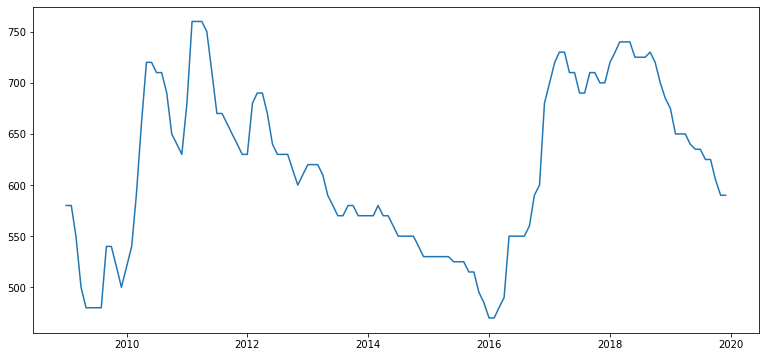

In [6]:
pyplot.figure(figsize = (13,6))
series_x['Price'] = series_x['Price'].astype(str).astype(float)
series_x.index = pd.to_datetime(series_x.index)
pyplot.plot(series_x)
pyplot.show()

## 2 Year Data Split

In [9]:
train_x = series_x[:108]
valid_x = series_x[108:]

In [10]:
len(valid_x)

24

## Build the Model

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=963.900, BIC=979.993, Fit time=0.333 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1254.321, BIC=1259.685, Fit time=0.028 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=987.418, BIC=995.464, Fit time=0.074 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1132.988, BIC=1141.034, Fit time=0.081 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=963.471, BIC=976.882, Fit time=0.249 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=965.506, BIC=976.234, Fit time=0.156 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=962.775, BIC=978.868, Fit time=0.233 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1057.513, BIC=1068.241, Fit time=0.098 seconds
Fit ARIMA: order=(2, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=966.763, BIC=988.220, Fit time=0.267 seconds
Fit ARIMA: order=(0, 0, 3) seasonal_order=(0, 0, 

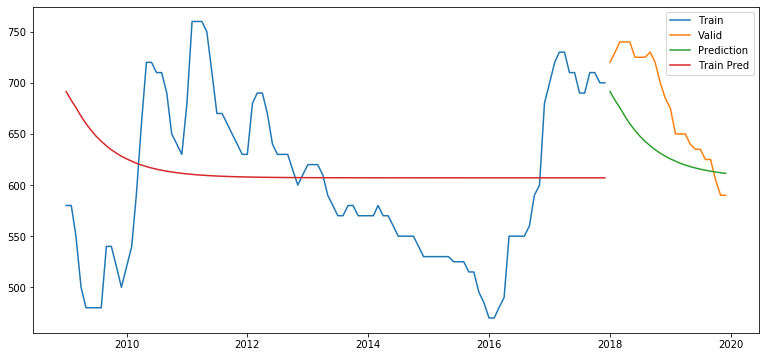

In [11]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
model = auto_arima(train_x, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_x)
trainAcc = model.predict(n_periods = len(train_x))
trainAcc = pd.DataFrame(trainAcc, index = train_x.index, columns = ['trainPred'])

forecast = model.predict(n_periods= 24)
forecast = pd.DataFrame(forecast,index = valid_x.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize =(13,6))
plt.plot(train_x, label='Train')
plt.plot(valid_x, label='Valid')
plt.plot(forecast, label='Prediction')
plt.plot(trainAcc, label = "Train Pred")
plt.legend(loc = 'best')
plt.show()

## MAPE Calculation

In [12]:
ape =  abs(valid_x['Price'] - forecast['Prediction'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.06507723308251179


## 1 Year Data Split

In [13]:
train_x = series_x[:120]
valid_x = series_x[120:]

In [14]:
len(valid_x)

12

## Build the Model

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1060.602, BIC=1077.327, Fit time=0.228 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1406.110, BIC=1411.685, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1087.110, BIC=1095.473, Fit time=0.062 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1266.661, BIC=1275.023, Fit time=0.097 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1059.914, BIC=1073.852, Fit time=0.162 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1062.617, BIC=1073.767, Fit time=0.132 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1059.849, BIC=1076.574, Fit time=0.180 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1179.896, BIC=1191.046, Fit time=0.130 seconds
Fit ARIMA: order=(2, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=1063.848, BIC=1086.148, Fit time=0.244 seconds
Fit ARIMA: order=(0, 0, 3) seasonal_o

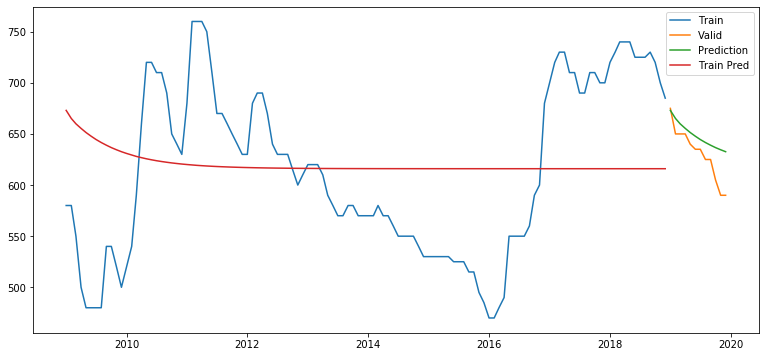

In [16]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
model = auto_arima(train_x, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_x)
trainAcc = model.predict(n_periods = len(train_x))
trainAcc = pd.DataFrame(trainAcc, index = train_x.index, columns = ['trainPred'])

forecast = model.predict(n_periods= 12)
forecast = pd.DataFrame(forecast,index = valid_x.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize =(13,6))
plt.plot(train_x, label='Train')
plt.plot(valid_x, label='Valid')
plt.plot(forecast, label='Prediction')
plt.plot(trainAcc, label = "Train Pred")
plt.legend(loc = 'best')
plt.show()

## MAPE Calculation

In [17]:
ape =  abs(valid_x['Price'] - forecast['Prediction'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.029289482542929766


## Future 24 Forecasts

In [18]:
train_x = series_x[:132]
#valid_x = series_x[120:]

In [20]:
train_x.tail()

,Price
Date,
2019-08-01,625.0
2019-09-01,625.0
2019-10-01,605.0
2019-11-01,590.0
2019-12-01,590.0


## Build the Model

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1156.092, BIC=1173.389, Fit time=0.110 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1535.315, BIC=1541.080, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1185.540, BIC=1194.189, Fit time=0.055 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1381.748, BIC=1390.397, Fit time=0.094 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1155.711, BIC=1170.125, Fit time=0.180 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1158.622, BIC=1170.154, Fit time=0.128 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1155.087, BIC=1172.383, Fit time=0.233 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1286.096, BIC=1297.627, Fit time=0.141 seconds
Fit ARIMA: order=(2, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=1159.076, BIC=1182.138, Fit time=0.253 seconds
Fit ARIMA: order=(0, 0, 3) seasonal_o

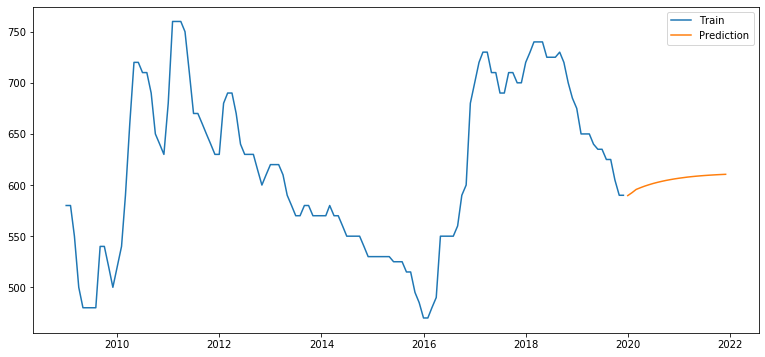

In [21]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from datetime import date
from dateutil.rrule import rrule, MONTHLY, YEARLY
from dateutil.relativedelta import *


model = auto_arima(train_x, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_x)

#Saving training predictions
trainAcc = model.predict(n_periods = len(train_x))
trainAcc = pd.DataFrame(trainAcc, index = train_x.index, columns = ['trainPred'])

#Saving forecasted predictions
forecast_09 = model.predict(n_periods= 24)
forecast_09 = pd.DataFrame(forecast_09,index = pd.date_range('2020-01-01','2021-12-01', freq = 'MS'), columns=['Prediction'])

#Plot the predictions for validation set
plt.figure(figsize =(13,6))
plt.plot(train_x, label='Train')
# #plt.plot(valid_09, label='Valid')
plt.plot(forecast_09, label='Prediction')
# #plt.plot(trainAcc, label = "Train Pred")
plt.legend(loc = 'best')
plt.show()

In [22]:
forecast_09

,Prediction
2020-01-01,589.701170
2020-02-01,592.613062
2020-03-01,595.713520
2020-04-01,597.425462
2020-05-01,598.958953
2020-06-01,600.332593
2020-07-01,601.563046
2020-08-01,602.665238
2020-09-01,603.652537
2020-10-01,604.536922


## Accuracy Sheet Loop

In [23]:
y_hat = read_csv('Y-hat-avg-forward_temp.csv', parse_dates=[1], index_col=0)
y_hat['Price'] = y_hat['Price'].astype(str).astype(float)
y_hat.index = pd.to_datetime(y_hat.index)

In [25]:
y_hat.tail()

,Price
Date,
2021-08-01,0.0
2021-09-01,0.0
2021-10-01,0.0
2021-11-01,0.0
2021-12-01,0.0


In [ ]:
import statsmodels.api as sm
import datetime

accuracy = pd.read_csv("C:\\Users\\TrinaNaskar\\Documents\\Daimler\\Notebooks\\Accuracy_Input_Steel_temp.csv")


# Setting date to index

accuracy['Snap_Month'] = pd.to_datetime(accuracy['Snap_Month'])

accuracy.set_index('Snap_Month', inplace=True)

#print(accuracy)


for i in range(108,132):
    
    train_x = series_x[:i]
#   valid_x = series_x[i:i+24]
#   train_x_exog = exog_series[:i]
    valid_x_exog = y_hat[i:i+24]

    model = auto_arima(train_x, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(train_x)

    #Saving training predictions
    trainAcc = model.predict(n_periods = len(train_x))
    trainAcc = pd.DataFrame(trainAcc, index = train_x.index, columns = ['trainPred'])

    #Saving forecasted predictions
    forecast_09 = model.predict(n_periods= 24)
    forecast_09 = pd.DataFrame(forecast_09,index = index = valid_x_exog.index,columns=['Prediction'])

    forecast1 = pd.DataFrame({'Prediction': forecast_09['Prediction']})
    forecast1.set_index(accuracy.index[i-106:i-106+24],inplace=True)
    print(forecast1)
    accuracy=pd.merge(accuracy,forecast1,how='outer',left_index=True,right_index=True)



accuracy.columns = ['A','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24']

print(accuracy)    

accuracy.to_csv("C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Research\\New folder\\New Sheets\\Steel_R2_Acc_Sheet.csv")

